# Notebook illustrating the algorithm developped in algo.py

In [2]:
# some import, do not touch this
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 12]

import numpy as np
from sklearn.metrics import pairwise_distances

from algo import algo
from utils import plot, plot_interesting_points, gen_random, denoise

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
a, b, c, d, = gen_random(1000)
X = np.concatenate((a[:250], b, c, d),)

### Denoising

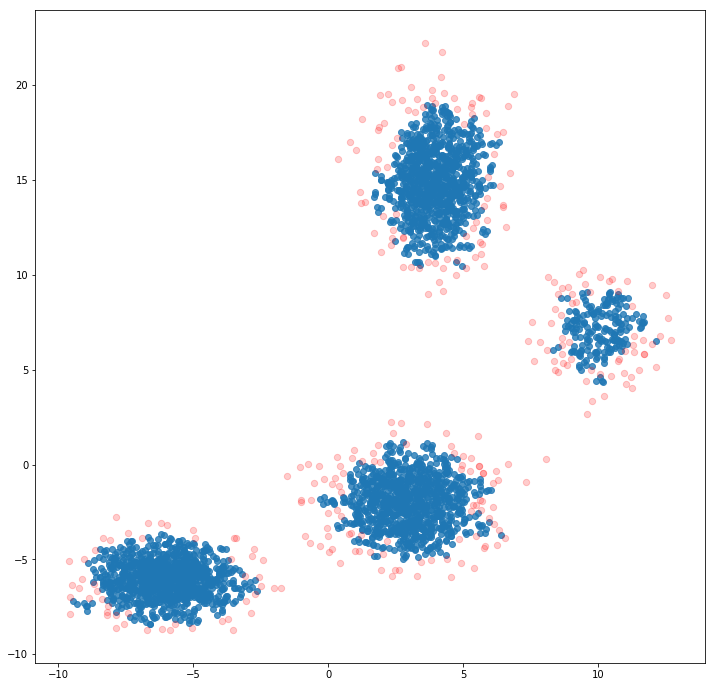

In [4]:
to_del = denoise(pairwise_distances(X, X), 2, 0.3)
plot_interesting_points(X, to_del, alpha=0.2)
X_cleaned = X[[i for i in range(X.shape[0]) if i not in to_del]]

### Dendrogram

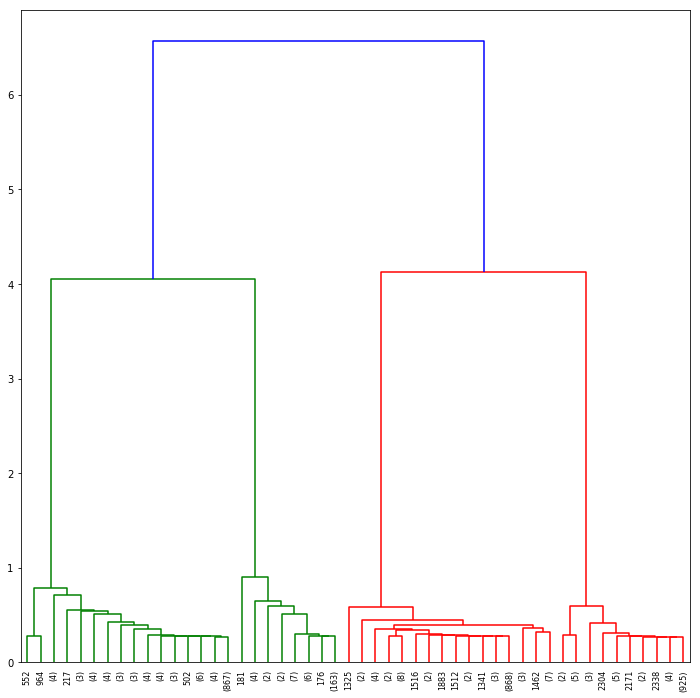

In [5]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
dist = squareform(pairwise_distances(X_cleaned, X_cleaned, 'euclidean'), checks=False)
link = linkage(dist, "single")
dend = dendrogram(link, truncate_mode="lastp", p=50)

### Topological Algo

In [6]:
n = 6
s = 2

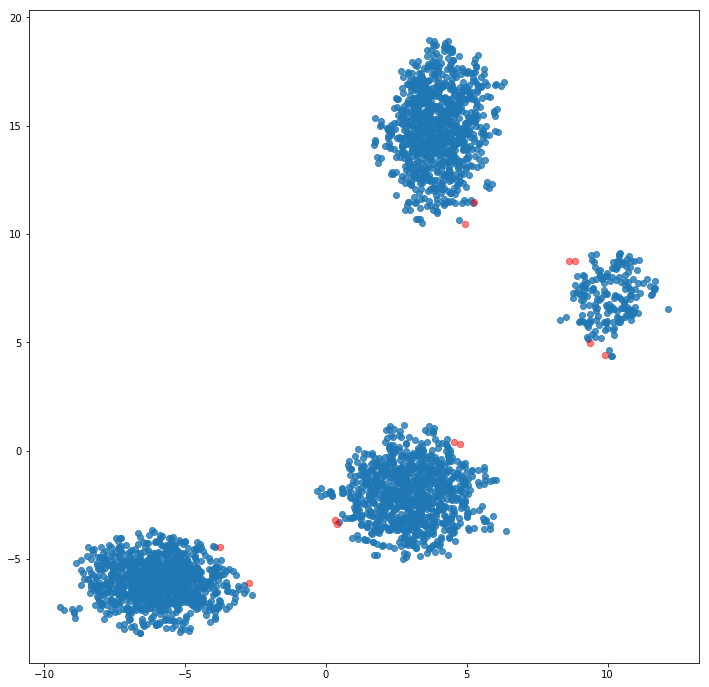

In [7]:
to_label = algo(X_cleaned, n=n, s=s, min_size=5, metric='euclidean')
plot_interesting_points(X_cleaned, to_label)

### Curve

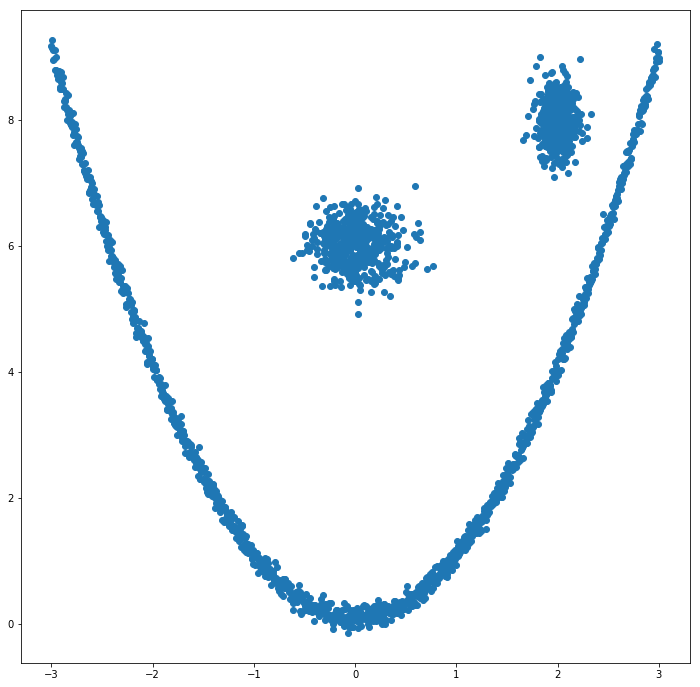

In [8]:
x = np.arange(-3, 3.01, 0.005)
x2 = x**2
noise = np.random.normal(0.1,0.1,len(x2))
x2 = x2 + noise
courbe = np.array([[i, j] for (i,j) in zip(x, x2)])
boule = np.random.multivariate_normal([0, 6], [[0.05, 0], [0, 0.1]], size=[500,])
boule2 = np.random.multivariate_normal([2, 8], [[0.01, 0], [0, 0.1]], size=[500,])
X = np.concatenate((boule, courbe, boule2))
plt.scatter(X[..., 0], X[..., 1])

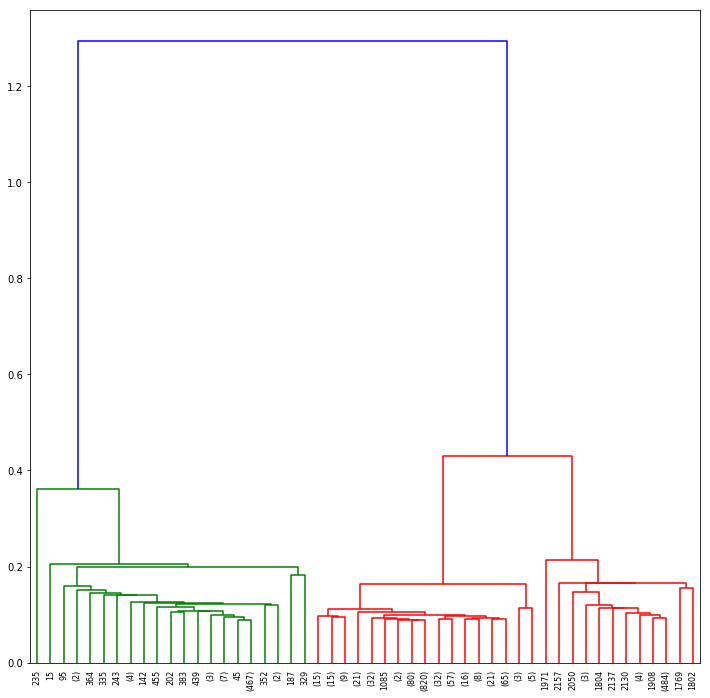

In [9]:
dist = squareform(pairwise_distances(X, X, 'euclidean'), checks=False)
link = linkage(dist, "single")
dend = dendrogram(link, truncate_mode="lastp", p=50)

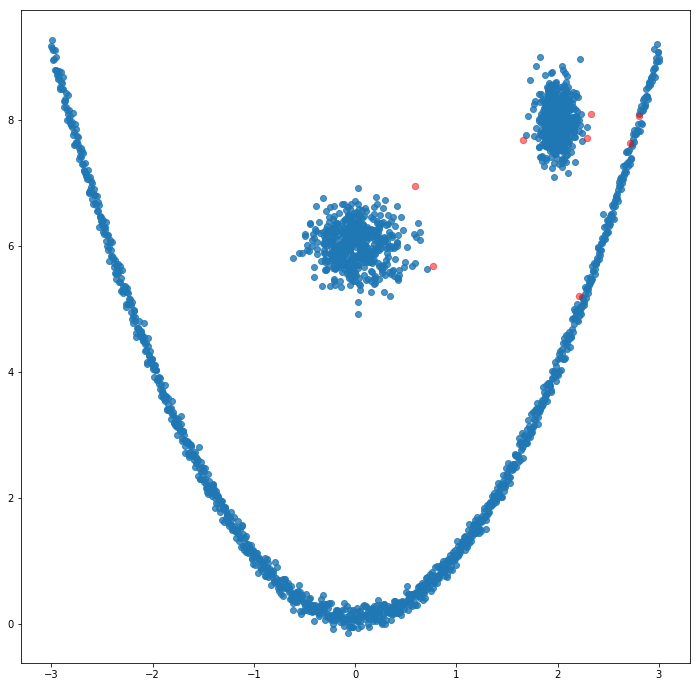

In [10]:
n = 4
s = 2
best = algo(X, n=n, s=s, min_size=5, metric='euclidean')
plot_interesting_points(X, best)